#### CEMENT CONCRETE STRENGTH PREDICTION

# Data description
The business meaning of each column in the data is as below

- CementComponent: How much cement is mixed
- BlastFurnaceSlag: How much Blast Furnace Slag is mixed
- FlyAshComponent: How much FlyAsh is mixed
- WaterComponent: How much water is mixed
- SuperplasticizerComponent: How much Super plasticizer is mixed
- CoarseAggregateComponent: How much Coarse Aggregate is mixed
- FineAggregateComponent: How much Coarse Aggregate is mixed
- AgeInDays: How many days it was left dry
- Strength: What was the final strength of concrete

In [24]:
# Reading the dataset
import pandas as pd
import numpy as np

In [25]:
data=pd.read_csv('ConcreteStrengthData.csv', encoding='latin')

In [26]:
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data.head(5)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [27]:
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (1030, 9)
Shape After deleting duplicate values: (1005, 9)


### Defining the problem statement:

Create a ML model which can predict the Strength of concrete

- Target Variable: Strength
- Predictors: water, cement, ash, days to dry etc.

### Features

**Cement** - It is the major factor that influences the strength and durability of concrete.

**Furnace Slag** - It is a supplementary materical that enhances the strength and durability of concrete and improves its resistance to chemical attack.

**Fly Ash** - It's a byproduct of coal combustion, used to reduce the carbon footprint.

**Water** - It is essential to initiate the chemical reaction between cement and other components, but it's excessive and inadequate amount can adversely affect the strength and durability of concrete.

**Superplaticizer** - Superplaticizers are chemical additives that can significantly improve the strength and workability of concrete by reducing its water-cement ratio without compromising its fluidity.

**Coarse Aggregate** - Coarse aggregates in concrete provide mechanical strength, increases the durability, and reduces the cost by reducing the cement content and also enhancing its resistance to compressive and tensile forces.

**Fine Aggregate** - Fine aggregate in concrete fills the voids between coarse aggregate particles and helps to produce a workable mix, resulting in a smoother surface finish and improved strength.

**Age** - Age is an important factor in determining the strength of concrete as it affects the chemical reaction between cement and ater, resulting in gradual strength gain over time.

#### Basic Data Exploration
There are four commands which are used for Basic data exploration in Python

- head() : This helps to see a few sample rows of the data
- info() : This provides the summarized information of the data
- describe() : This provides the descriptive statistical details of the data
- nunique(): This helps us to identify if a column is categorical or continuous

In [28]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [32]:
# Looking at the descriptive statistics of the data
data.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
CementComponent,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
BlastFurnaceSlag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
FlyAshComponent,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
WaterComponent,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
SuperplasticizerComponent,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
CoarseAggregateComponent,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
FineAggregateComponent,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
AgeInDays,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
Strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [33]:
data.nunique()

CementComponent              278
BlastFurnaceSlag             185
FlyAshComponent              156
WaterComponent               195
SuperplasticizerComponent    111
CoarseAggregateComponent     284
FineAggregateComponent       302
AgeInDays                     14
Strength                     845
dtype: int64

## let's look at the distribution of Target variable

- If target variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

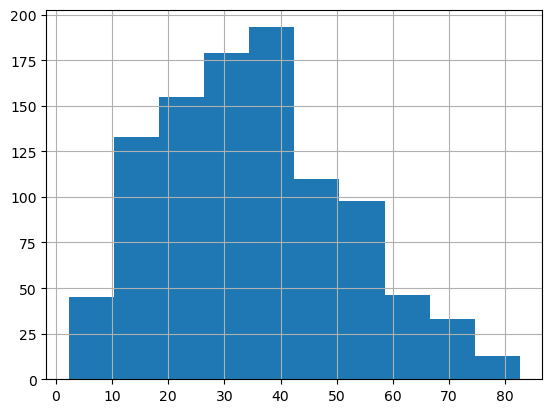

In [34]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
data['Strength'].hist()


- The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.



### Exploratory Data Analysis
- Categorical variables: Bar plot
- Continuous variables: Histogram

array([[<Axes: title={'center': 'CementComponent '}>,
        <Axes: title={'center': 'BlastFurnaceSlag'}>,
        <Axes: title={'center': 'FlyAshComponent'}>],
       [<Axes: title={'center': 'WaterComponent'}>,
        <Axes: title={'center': 'SuperplasticizerComponent'}>,
        <Axes: title={'center': 'CoarseAggregateComponent'}>],
       [<Axes: title={'center': 'FineAggregateComponent'}>,
        <Axes: title={'center': 'AgeInDays'}>, <Axes: >]], dtype=object)

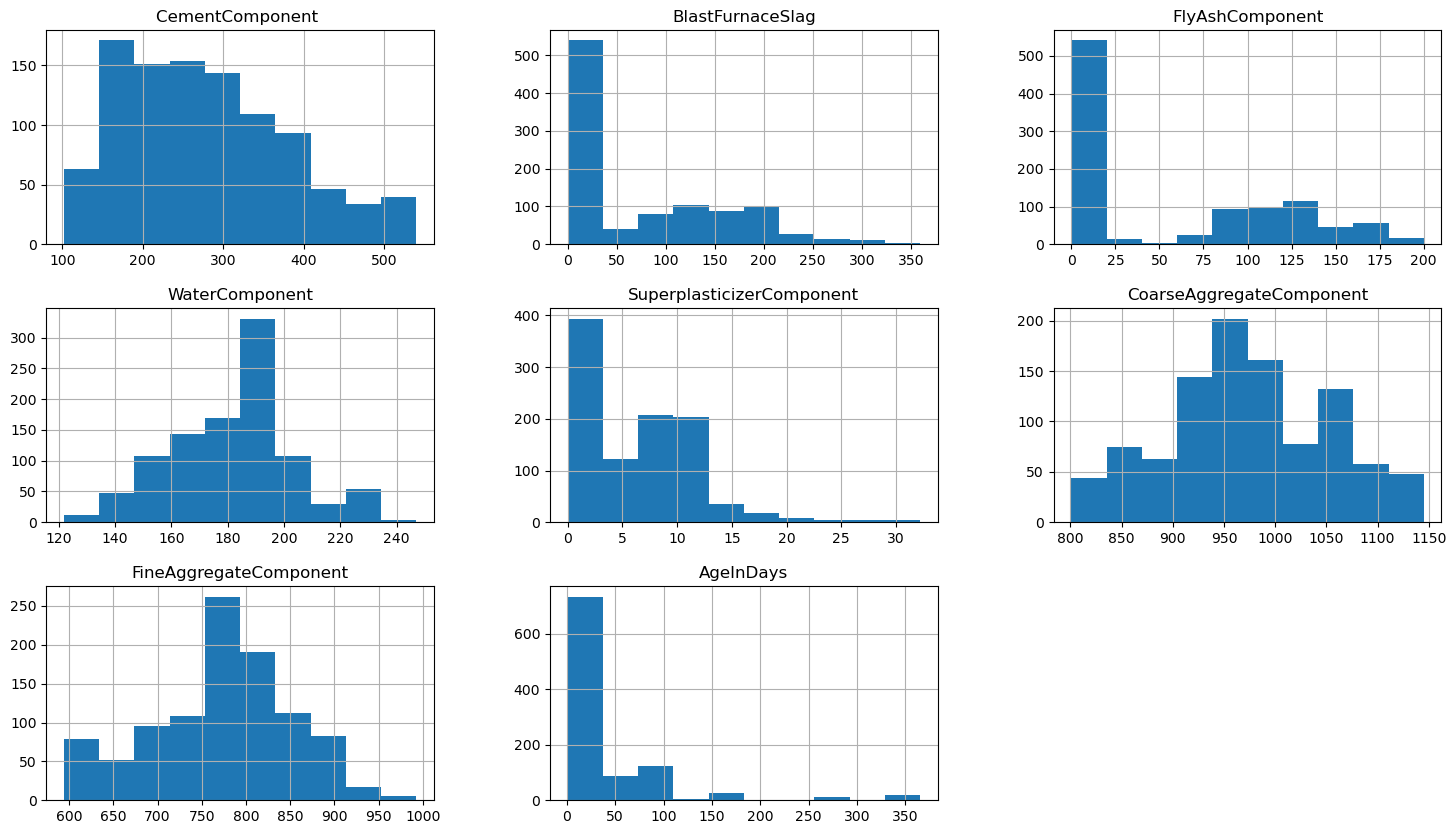

In [35]:
# Plotting histograms of multiple columns together
data.hist(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
                'WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent', 
                           'FineAggregateComponent', 'AgeInDays'], figsize=(18,10))

### Selected Continuous Variables:

**CementComponent** : Selected. The distribution is good.

**BlastFurnaceSlag:** Selected. The distribution is good.

**FlyAshComponent**: Selected. The distribution is good.

**WaterComponent**: Selected. The distribution is good.

**SuperplasticizerComponent**: Selected. The distribution is good.

**CoarseAggregateComponent**: Selected. The distribution is good.

**FineAggregateComponent**: Selected. The distribution is good.

**AgeInDays**: Selected. The distribution is skewed, but the tail is thick, hence acceptable.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [36]:
data.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

# Outliers Treatment

There are below two options to treat outliers in the data.

- Method-1: Delete the outlier Records. Only if there are just few rows lost.
- Method-2: Impute the outlier values with a logical business value

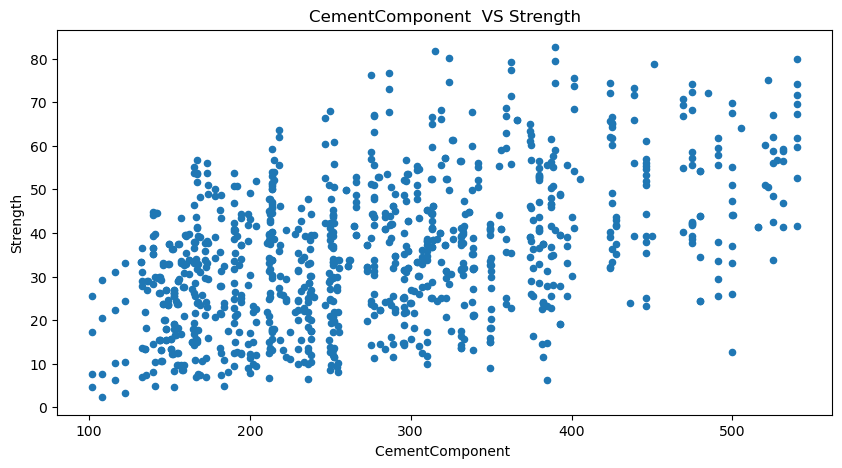

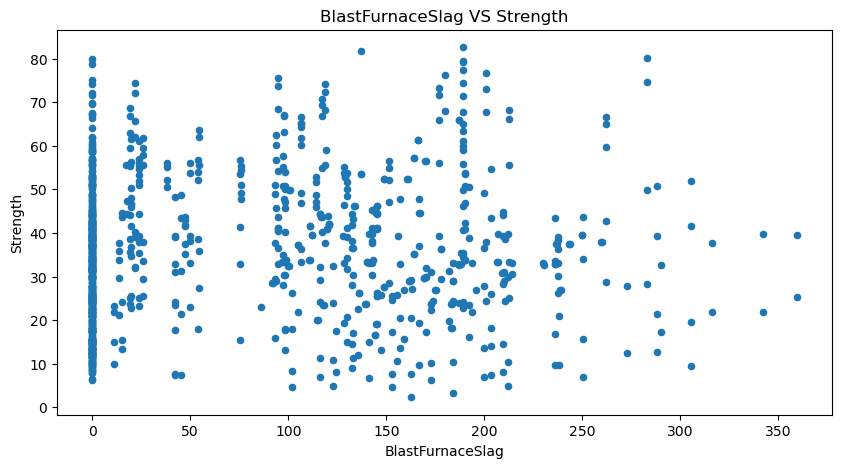

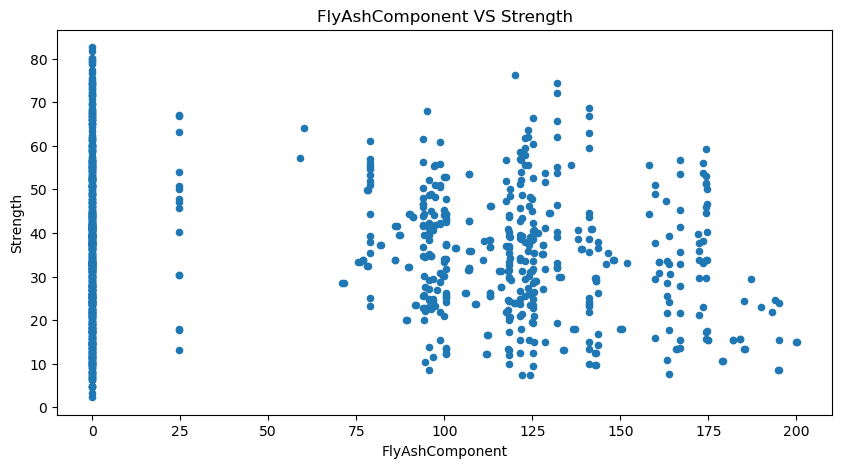

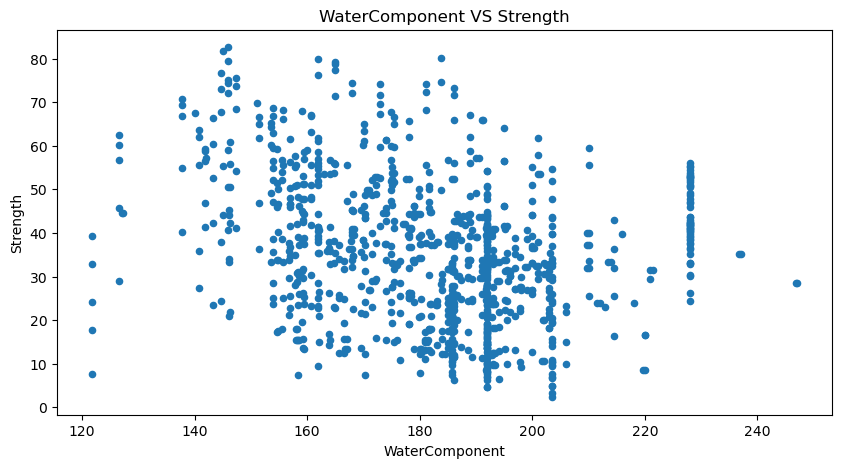

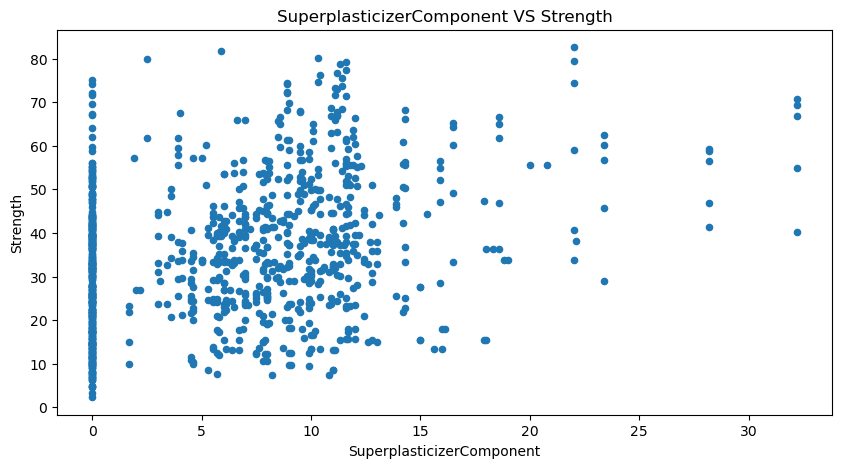

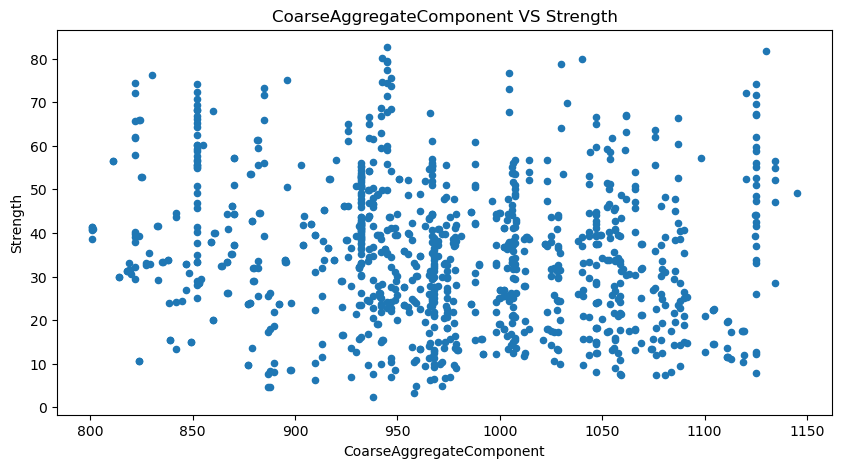

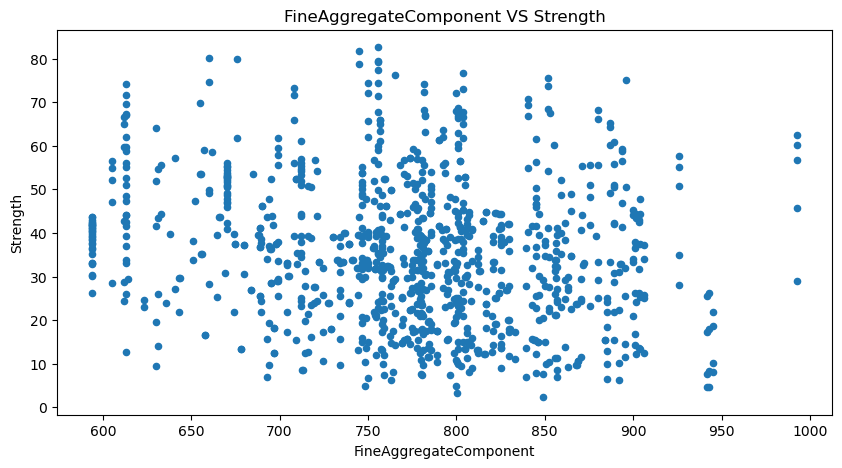

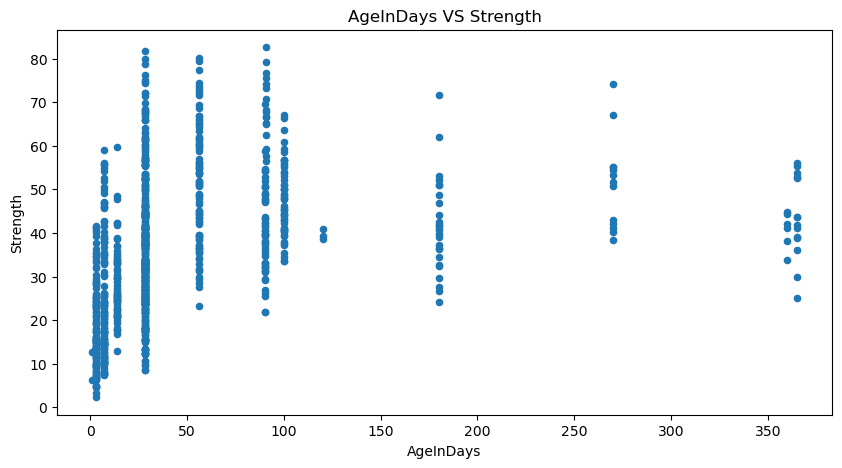

In [37]:
ContinuousCols=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
                'WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent', 
                           'FineAggregateComponent', 'AgeInDays']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='Strength', figsize=(10,5), title=predictor+" VS "+ 'Strength')

In [38]:
# Calculating correlation matrix
ContinuousCols=['Strength','CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
                'WaterComponent', 'SuperplasticizerComponent','CoarseAggregateComponent', 
                           'FineAggregateComponent', 'AgeInDays']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData


,Strength,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
Strength,1.000000,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367
CementComponent,0.488283,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
BlastFurnaceSlag,0.103374,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
FlyAshComponent,-0.080648,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
WaterComponent,-0.269624,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
SuperplasticizerComponent,0.344209,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
CoarseAggregateComponent,-0.144717,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
FineAggregateComponent,-0.186448,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
AgeInDays,0.337367,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


In [39]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Strength'][abs(CorrelationData['Strength']) > 0.3 ]

Strength                     1.000000
CementComponent              0.488283
SuperplasticizerComponent    0.344209
AgeInDays                    0.337367
Name: Strength, dtype: float64

In [50]:
SelectedColumns=['CementComponent ','SuperplasticizerComponent','AgeInDays']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

,CementComponent,SuperplasticizerComponent,AgeInDays
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,270
3,332.5,0.0,365
4,198.6,0.0,360


# Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

In [51]:
#### Converting the nominal variable to numeric using get_dummies()

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Strength']=data['Strength']

# Printing sample rows
DataForML_Numeric.head()

,CementComponent,SuperplasticizerComponent,AgeInDays,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


## Splitting the data into Training and Testing sample

In [52]:
#Separate Target Variable and Predictor Variables
TargetVariable='Strength'
Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [53]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 3)
(703,)
(302, 3)
(302,)


# Randome Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100)


In [55]:
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

In [56]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

R2 Value: 0.7986966429160197


<Axes: >

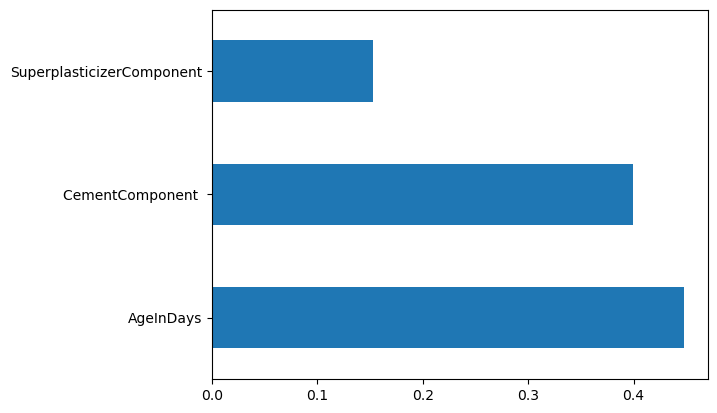

In [57]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [58]:
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())



##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     47.13               43.0
1     18.20               27.0
2     24.48               32.0
3     19.69               31.0
4     61.24               43.0


In [59]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

Mean Accuracy on test data: 77.4177064026664
Median Accuracy on test data: 85.06386541990496


In [60]:
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [61]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [80.27372482 75.45171421 83.03317952 77.82132023 81.69980994 65.4123757
 62.1237558  74.02112723 71.50444279 69.90222725]

Final Average Accuracy of the model: 74.12


# AdaBoost

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [63]:
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

In [64]:
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)


C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [65]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))


R2 Value: 0.9708988547084164


<Axes: >

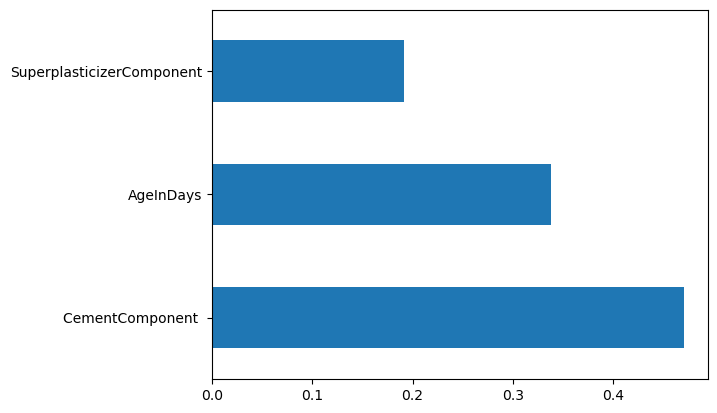

In [66]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


In [67]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   Strength  PredictedStrength
0     47.13               47.0
1     18.20               28.0
2     24.48               25.0
3     19.69               31.0
4     61.24               57.0


In [68]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 80.83742454628428
Median Accuracy on test data: 88.0881214720658


In [69]:
#Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [70]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\a\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\admin\anaconda3\


Accuracy values for 10-fold Cross Validation:
 [78.1642073  79.64208399 79.94190956 76.6934167  80.5753205  65.84106638
 69.72283158 78.28629093 85.81093432 89.24905019]

Final Average Accuracy of the model: 78.39
